In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.rcParams.update({'font.size': 18})

# Dataframes per i vari lanci

df1 = pd.read_csv("real1.txt")
df2 = pd.read_csv("real2.txt")
df10 = pd.read_csv("real10.txt")
df100 = pd.read_csv("real100.txt")

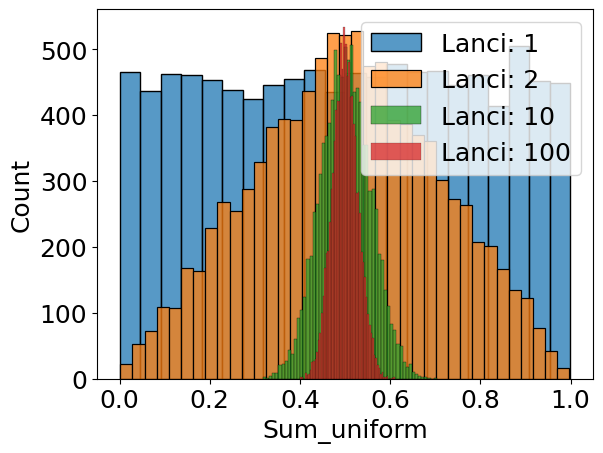

In [2]:
# Plots per la distribuzione uniforme per i vari lanci
sns.histplot(df1["Sum_uniform"],label="Lanci: 1")
sns.histplot(df2["Sum_uniform"],label="Lanci: 2")
sns.histplot(df10["Sum_uniform"],label="Lanci: 10")
sns.histplot(df100["Sum_uniform"],label="Lanci: 100")
plt.legend()

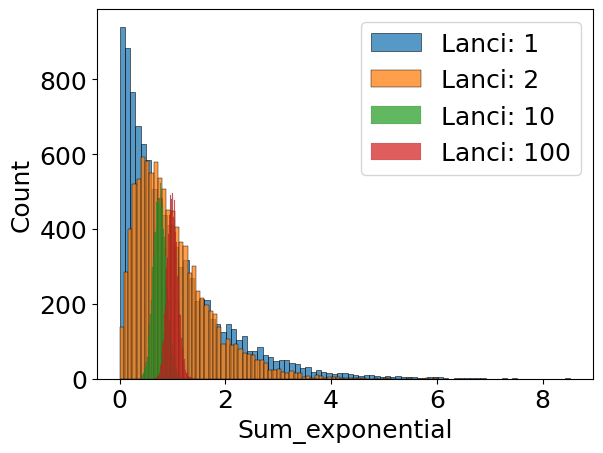

In [3]:
# Plots per la distribuzione uniforme per i vari lanci

sns.histplot(df1["Sum_exponential"],label="Lanci: 1")
sns.histplot(df2["Sum_exponential"],label="Lanci: 2")
sns.histplot(df10["Sum_exponential"],label="Lanci: 10")
sns.histplot(df100["Sum_exponential"],label="Lanci: 100")
plt.legend()

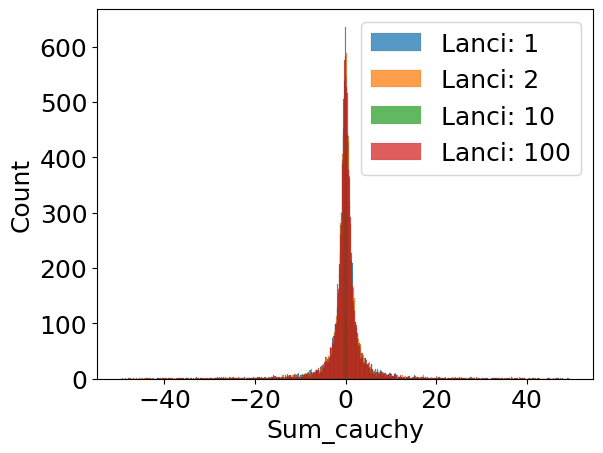

In [4]:
# Plots per la distribuzione uniforme per i vari lanci
limit = 50.0
df1 = df1[(df1["Sum_cauchy"]< limit) & (df1["Sum_cauchy"]> -limit)]
df2 = df2[(df2["Sum_cauchy"]< limit) & (df2["Sum_cauchy"]> -limit)]
df10 = df10[(df10["Sum_cauchy"]< limit) & (df10["Sum_cauchy"]> -limit)]
df100 = df100[(df100["Sum_cauchy"]< limit) & (df100["Sum_cauchy"]> -limit)]

sns.histplot(df1["Sum_cauchy"],label="Lanci: 1")
sns.histplot(df2["Sum_cauchy"],label="Lanci: 2")
sns.histplot(df10["Sum_cauchy"],label="Lanci: 10")
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100")
plt.legend()


## TEST DEL TEOREMA DEL LIMITE CENTRALE

===p-value===
0.4130339617289702


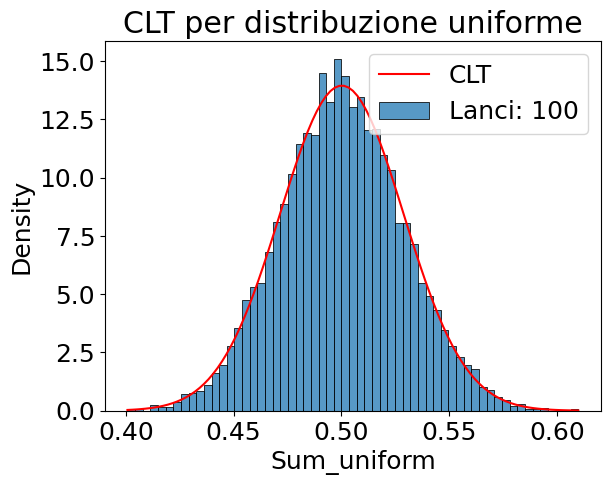

In [5]:
# Fit dei dati ne caso N = 100

mu = df100["Sum_uniform"].mean()
sigma = df100["Sum_uniform"].std()

xmin=np.min(df100["Sum_uniform"])
xmax=np.max(df100["Sum_uniform"])
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 

plt.title("CLT per distribuzione uniforme")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_uniform"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_uniform"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("===p-value===")
print(p)

Supponendo un valore di comparazione per la p-value come $\alpha = 0.05$, si che p$ > \alpha$, e quindi non si può scartare l'ipotesi nulla

===p-value===
0.018532270879817927


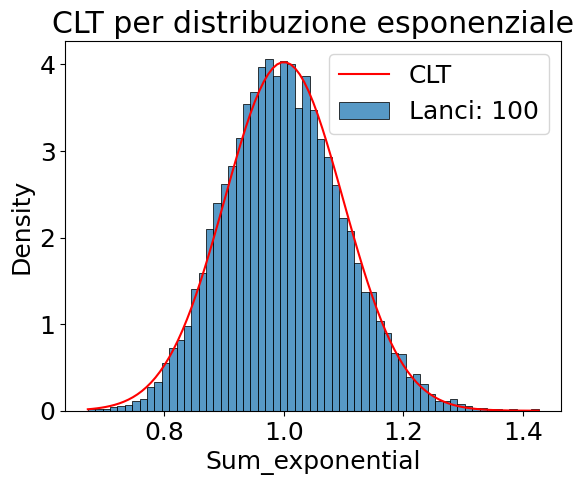

In [6]:
mu = df100["Sum_exponential"].mean()
sigma = df100["Sum_exponential"].std()

xmin=np.min(df100["Sum_exponential"])
xmax=np.max(df100["Sum_exponential"])
x = np.linspace(xmin,xmax,101)
g=stats.norm(loc=mu, scale=sigma) 

plt.title("CLT per distribuzione esponenziale")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_exponential"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_exponential"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("===p-value===")
print(p)

Nel caso della distribuzione esponenziale p$ > \alpha$ nel nostro caso e bisogna rigettare l'ipotesi nulla, d'altro canto un valore utilizzato per $\alpha$ è $0.01$ in questo caso non si potrebbe rigettare l'ipotesi nulla. Quindi magari aumentando il numero di campioni (i.e. 100 -> 1000) il fit potrebbe essere più buono.

==p-value==
0.0


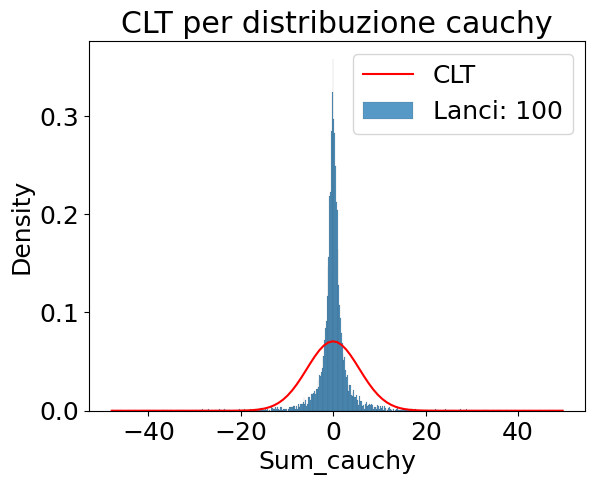

In [7]:
xmin=np.min(df100["Sum_cauchy"])
xmax=np.max(df100["Sum_cauchy"])
x = np.linspace(xmin,xmax,101)
mu = df100["Sum_cauchy"].mean()
sigma = df100["Sum_cauchy"].std()
g=stats.norm(mu,sigma) 

plt.title("CLT per distribuzione cauchy")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100",stat="density")
plt.legend()
#test per vedere la bontà del fit
set1 = df100["Sum_cauchy"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.norm.cdf
                   (x, loc=mu, scale=sigma))
print("==p-value==")
print(p)

Essendo la p value nulla si può scaratre l'ipotesi che valga il CLT con gaussiana per la distribuzione di Cauchy

==p-value==
0.23544228688682256


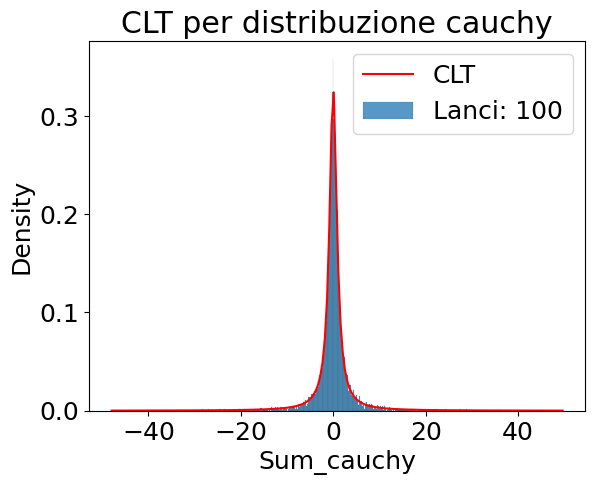

In [8]:
xmin=np.min(df100["Sum_cauchy"])
xmax=np.max(df100["Sum_cauchy"])
x = np.linspace(xmin,xmax,202)
mu,gamma = stats.cauchy.fit(df100["Sum_cauchy"])
g=stats.cauchy(mu,gamma) 

plt.title("CLT per distribuzione cauchy")
plt.plot(x, g.pdf(x), label="CLT",color='r')
sns.histplot(df100["Sum_cauchy"],label="Lanci: 100",stat="density")
plt.legend()

#test per vedere la bontà del fit
set1 = df100["Sum_cauchy"]
y1=np.sort(set1)
idx1 = [ i/len(y1) for i in range(len(y1))]

yy=set1.to_numpy()
s,p = stats.kstest(yy,lambda x: 
                   stats.cauchy.cdf
                   (x, loc=mu, scale=gamma))
print("==p-value==")
print(p)

La p-value è abbastanza alta da poter non scartare l'ipotesi nulla che sia distribuita secondo una distribuzione di Cauchy, in quanto come prima p$ > \alpha$